## Cluster analysis
Mathematics and Methods in Machine Learning and Neural Networks<br>
Group 11
Simo Ojala, Jori Nordlund, Esa Ryömä<br>
Helsinki Metropolia University of Applied sciences
30.01.2020

In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

## Data

In [2]:
# Read the csv-file from a github repository
url = 'https://raw.githubusercontent.com/esaryoma/clusterAnalysisForDrones/master/drone_delivery_v1.csv'
#df = pd.read_csv(r"C:\Users\jorin\Desktop\NNM\Method\Data\drone_delivery_v1.csv", sep=";")
#df = pd.read_csv(r"C:\Users\Nekuin\Desktop\drone_delivery_v1.csv", sep=";")
df = pd.read_csv(url, sep=";")
dfk = df

# Let's drop column 'clientid' as it is not used in clustering
dfk = dfk.drop(columns=['clientid'])

dfk.describe()

,x,y
count,5956.000000,5956.000000
mean,508.823177,427.554772
std,271.061462,289.044640
min,0.017692,0.043285
25%,282.582920,170.079921
50%,518.100892,397.786441
75%,727.156497,669.982518
max,999.533215,999.731720


## Scatterplot
### 1. Visualize the client locations by making a two-dimensional scatterplot

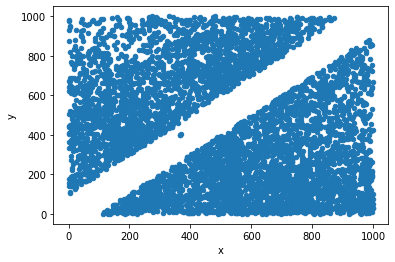

In [3]:
dfk.plot.scatter(x='x', y='y')
plt.show()

## K-means training

### 5. Play with the number of depots. What are the optimal locations for 10 depots, for example? Do you see a difference in the computation time when the number of depots increases?

### A:


In [4]:
# Number of drone depots is the number of clusters we want to divide the data into
depots = 100

# Kmeans().fit(dataFrame) computes cluster analysis. n_clusters is the number of clusters.
# Result is saved to variable kmeans (lowercase k). Result is a 'fitted estimator', which is a trained algorithm? 
# Look up 
time_start = time.perf_counter()
#run your code

kmeans = KMeans(n_clusters=depots, random_state=0).fit(dfk)

time_elapsed = (time.perf_counter() - time_start) # Time it takes to train the model
print(time_elapsed)
kmeans

2.6893045


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Computation times:
- With 3 depots time is around 0.12s
- With 10 depots time is around 0.5s

## Centroids

In [5]:
# kmeans is an estimator and the api exposes estimator parameters ending in underscores
centroids = kmeans.cluster_centers_

### 4. Make a scatterplot that uses three different colours. The markers with the same colour are served by the same depot.
NOTE: Number of depots is different from three but principal is the same.

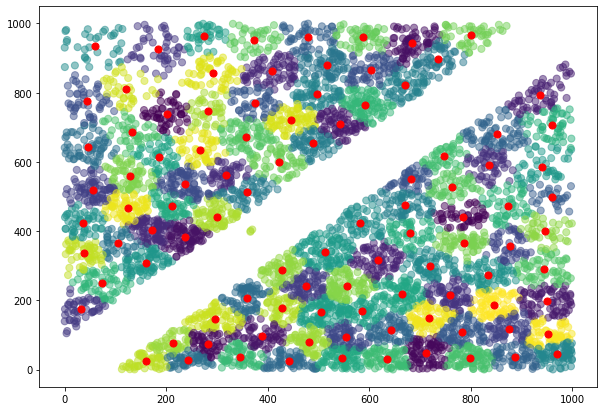

In [6]:
plt.figure(figsize=(10,7))
# kmeans.labels_ contains an array of labels. Each data point is given a label, which depends on the cluster it belongs to. 
# Here kmeans.labels_ gives each cluster a distinct color with the c parameter.  

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

### 3. Attach the information on the closest depot to each client. That is, generate a data frame that is similar to the original one with the exception that it has an additional column that contains the identifier of the depot nearest to the client. Print the first 10 rows of the new data frame.

In [7]:
# Add a column "centroid" which contains the label for each data point (location coordinates)
dfk["centroid"] = kmeans.labels_
print(dfk[:10])

            x           y  centroid
0  622.771572  164.857623        57
1  416.357298  630.193634        77
2  292.735020  567.333231        13
3  737.211288  166.225676        97
4  540.475375  682.912298         8
5  535.469492  318.439661        54
6  640.380050  870.833221        25
7  235.772075  359.048203         5
8  481.896884  661.491838        42
9  730.032789  312.177817        47


### 6. Replace k-means with agglomerative hierarchical clustering and explore it with various depot numbers. What are your observations?

More in [Scikit User Guide](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) and function description for [agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

A: 

In [8]:
# Compute the clustering
time_start = time.perf_counter()
agglo = AgglomerativeClustering(n_clusters=depots).fit(dfk)
time_elapsed = (time.perf_counter() - time_start)
agglo.get_params()
print(time_elapsed)

1.0515667000000004


### Computation time and observations
When the number of depots grow so does the time it takes to calculate the clusters with the kmeans algorithm while the time to computate the agglomerative function stays approximately the same.

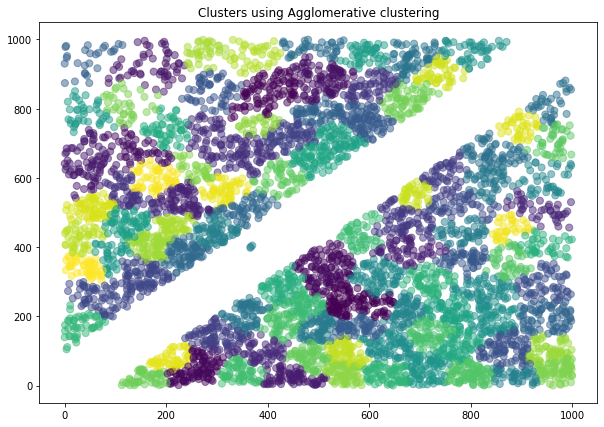

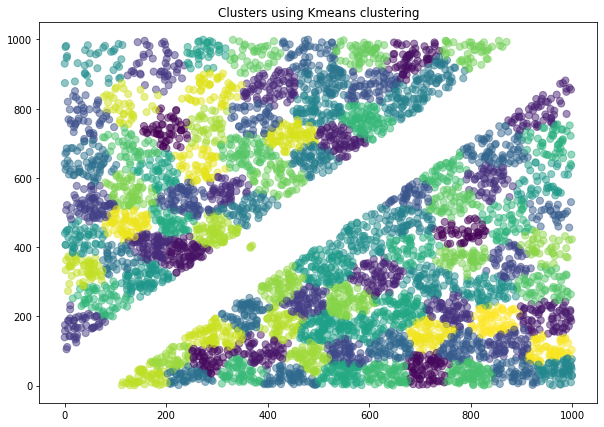

In [9]:
# Plot figures and play with other values

# Figure for agglomerative clustering
plt.figure(figsize=(10,7))
plt.title('Clusters using Agglomerative clustering')
plt.scatter(df['x'], df['y'], c= agglo.labels_.astype(float), s=50, alpha=0.5)

# Figure for kmeans clustering
plt.figure(figsize=(10,7))
plt.title('Clusters using Kmeans clustering')
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)

plt.show()